In [1]:
using ProRF, JLD2, Printf

In [2]:
R = RF("Data/GB1p")
X, Y, L = get_data(R, 'F');

In [3]:
learn_state, data_state_seed = @seed, @seed

(0xd0c1b409137a3717, 0x46547a3dff7eff51)

In [ ]:
RI = RFI(R, 2:1:4, 200:200:800);

In [ ]:
data_vector = Vector{Tuple{Matrix{Float64}, Matrix{Float64}}}()
for depth in 12:18
    @printf "Max depth : %d\n" depth
    push!(data_vector, iter_get_reg_value(RI, X, Y, 4, max_depth=depth, learn_state=learn_state, data_state_seed=data_state))
end

In [ ]:
@save "Save/gb1p.jld2" data_vector

In [3]:
@load "Save/gb1p.jld2" data_vector

1-element Vector{Symbol}:
 :data_vector

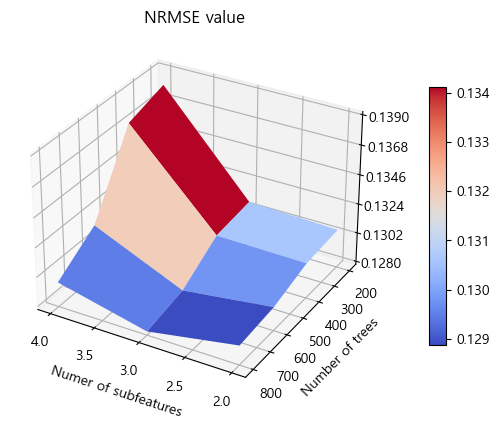

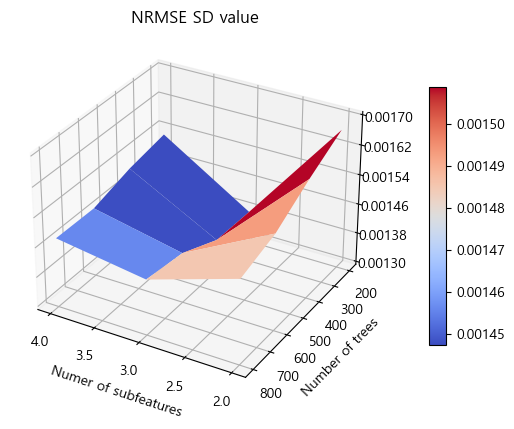

Max length : 12

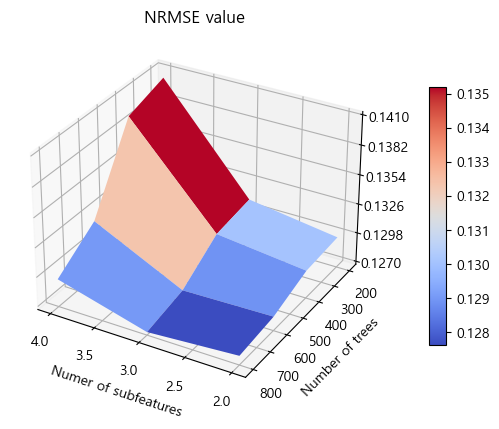

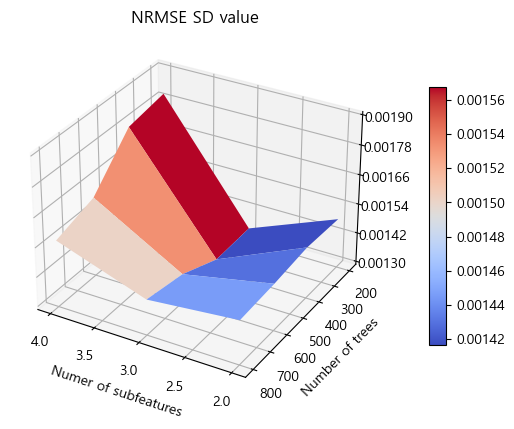

Max length : 13

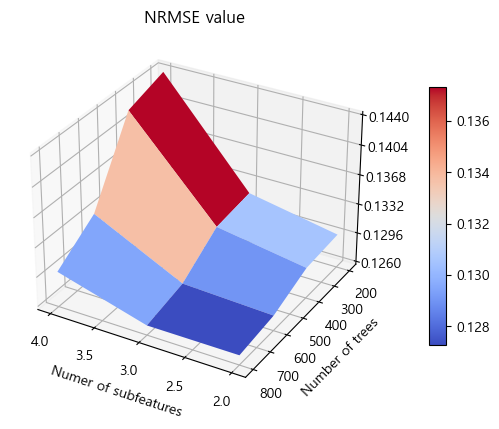

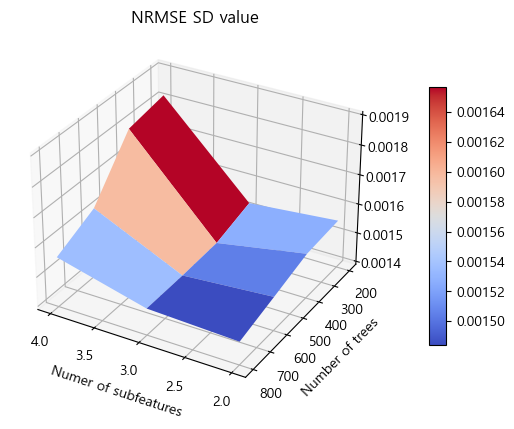

Max length : 14

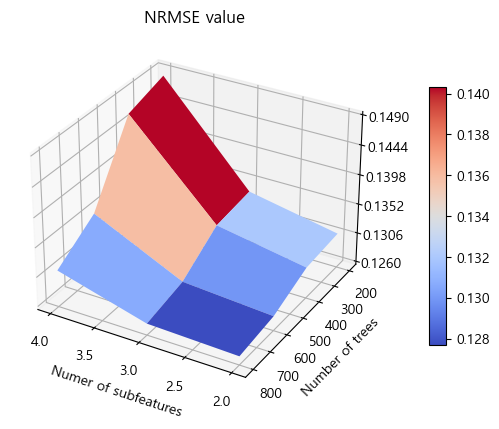

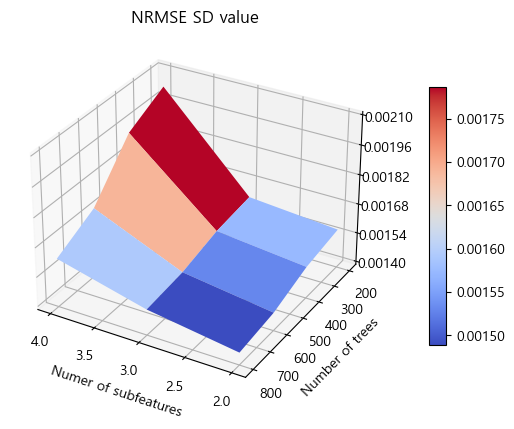

Max length : 15

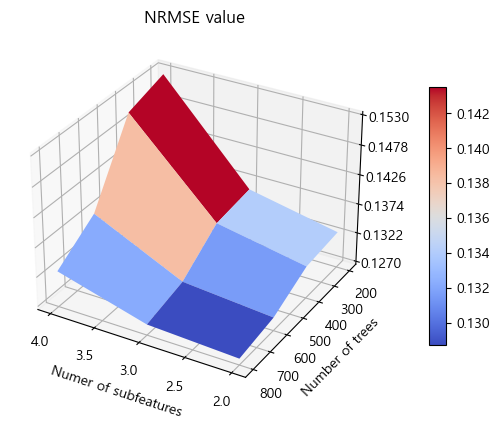

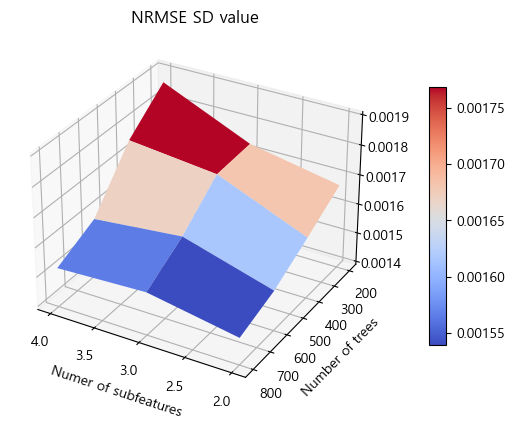

Max length : 16

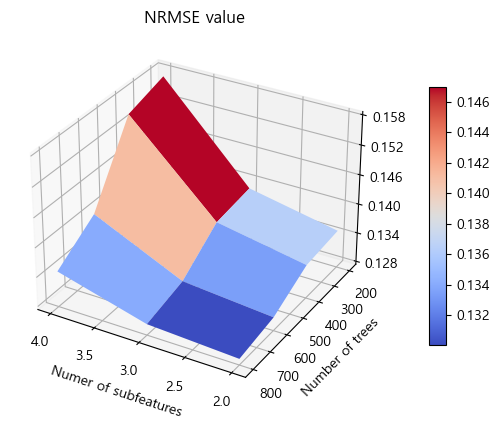

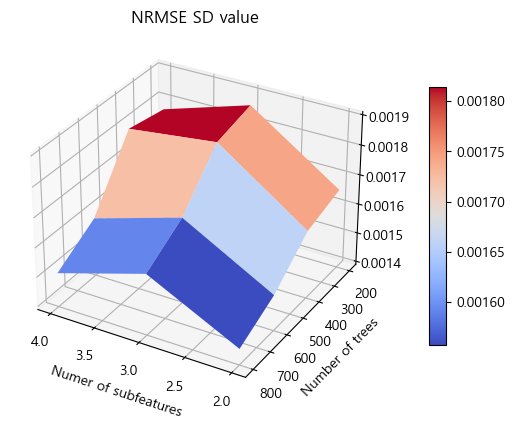

Max length : 17

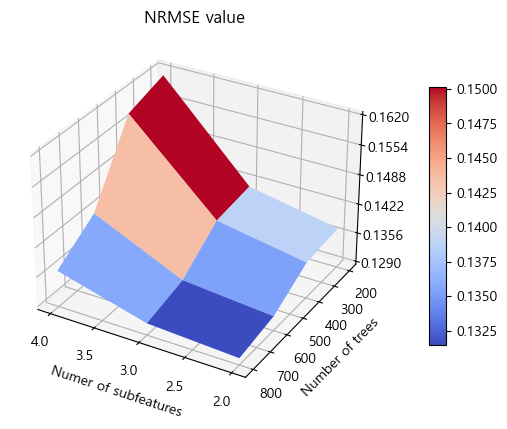

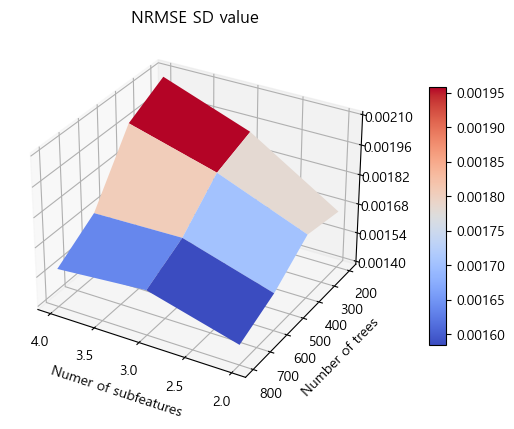

Max length : 18

In [4]:
for ((MeZ, SdZ), ind) in zip(data_vector, 12:18)
    @printf "Max length : %d" ind
    view_reg3d(RI, MeZ, title="NRMSE value", azim=120, scale=3);
    view_reg3d(RI, SdZ, title="NRMSE SD value", azim=120, scale=4);
end

In [4]:
for ((MeZ, SdZ), ind) in zip(data_vector, 12:18)
    println(minimum(MeZ))
end

Max length : 12

0.12804959771158606
0.12700257864575357
0.12680947307475957
0.12687553285375996
0.127578702112154
0.12862254507916893
0.12983564052379687


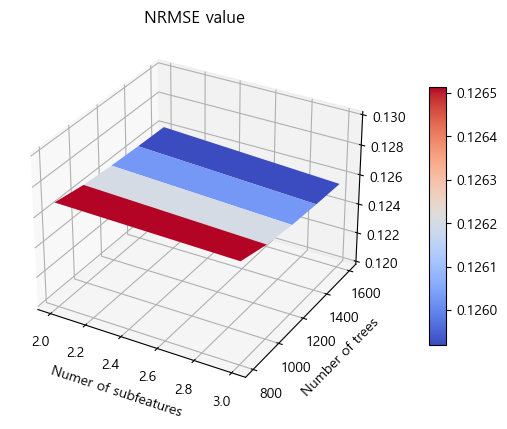

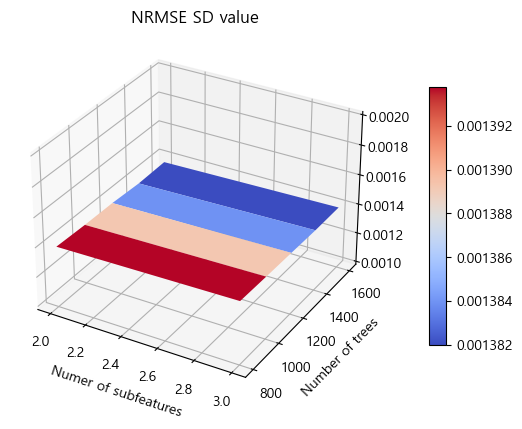

([0.12683516401998948 0.12651226721425837 … 0.12625577000710686 0.12618802416131894; 0.12661220233886528 0.12609959741050566 … 0.12567373557870157 0.1255597080053638], [0.001389340691389173 0.0013815176687531296 … 0.0013675316551198138 0.001372765626102677; 0.001404535881964061 0.0013997824586976073 … 0.0013924058700667409 0.001395236778820842])

In [4]:
RI = RFI(R, 2:1:3, 800:200:1600)
MZ, SZ = iter_get_reg_value(RI, X, Y, 4, max_depth=14, learn_state=learn_state, data_state_seed=data_state_seed)

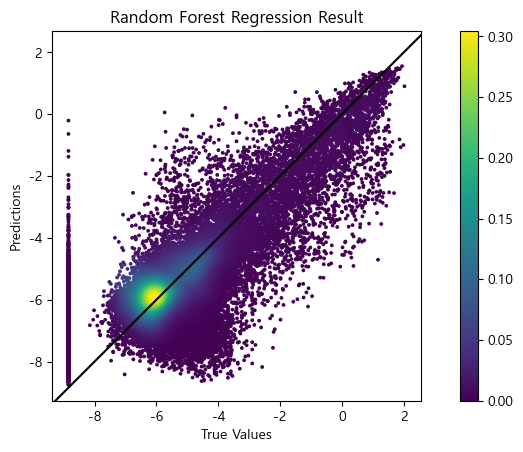

NRMSE : 0.126279


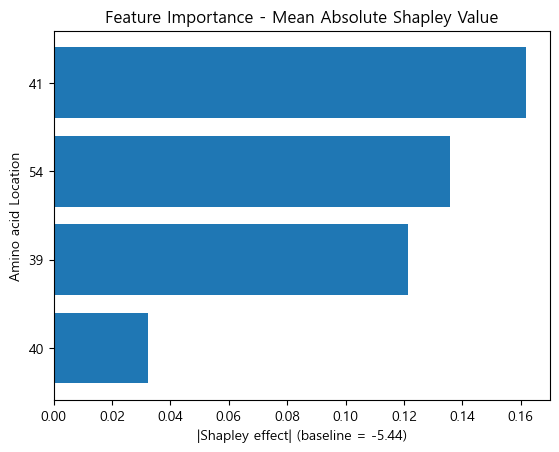

In [4]:
M, F = get_reg_importance(R, X, Y, L, 3, 1400, max_depth=14);

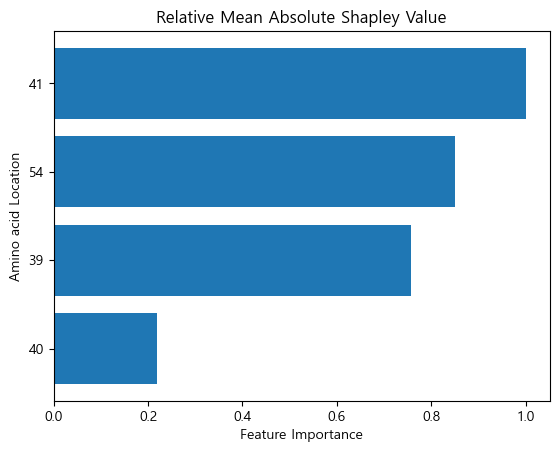

In [20]:
view_importance(R, L, F);